## MLP model

In [1]:
import numpy as np
from sklearn import metrics

def sig(x):
    return 1.0 /(1.0+np.exp(-x))
def dsig(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def dtanh(x):
    return 1-((np.exp(x)-np.exp(-x))**2/(np.exp(x)+np.exp(-x))**2)

class MLP():
    def __init__(self,ni,nh,no):
        self.input_num = ni # number of inputs
        self.hidden_num = nh # number of hidden units
        self.output_num = no # number of outputs
        
        self.w1 = np.array([]) # array containing weights in the lower layer
        self.w2 = np.array([]) # array containing weights in the upper layer
        self.dw1 = np.array([]) # arrays containing the weight *changes* to be applied onto W1
        self.dw2 = np.array([]) # arrays containing the weight *changes* to be applied onto W2
        self.z1 = np.array([]) # array containing the activations for the lower layer
        self.z2 = np.array([]) # array containing the activations for the upper layer
        self.h = np.array([]) # array where the values of the hidden neurons are stored 
        self.o = np.array([]) # array where the outputs are stored
    
    # Initialises W1 and W2 to small random values.
    # dW1 and dW2 to all zeroes
    def randomize(self):
        self.w1 = np.random.uniform(0.0,1.0,(self.input_num,self.hidden_num))
        self.w2 = np.random.uniform(0.0,1.0,(self.hidden_num,self.output_num))
        self.dw1 = np.zeros((self.input_num,self.hidden_num))
        self.dw2 = np.zeros((self.hidden_num,self.output_num))
    
    # Forward pass. 
    def forward(self,input_vectors,activation="sig"):
        self.z1 = np.dot(input_vectors,self.w1)
        if activation=="sig":
            self.h = sig(self.z1)
        elif activation=="tanh":
            self.h = tanh(self.z1)
            
        self.z2 = np.dot(self.h,self.w2)
        if activation=="sig":
            self.o = sig(self.z2)
        elif activation=="tanh":
            self.o = tanh(self.z2)
    
    # Backwards pass. 
    def backwards(self,input_vectors,target,activation="sig"):
        # Compute the error & weight change of upper layer
        output_error = np.subtract(target,self.o)
        if activation=="sig":
            delta_upper = dsig(self.z2)*output_error
            self.dw2 = np.dot(self.h.T,delta_upper)
        elif activation=="tanh":
            delta_upper = dtanh(self.z2)*output_error
            self.dw2 = np.dot(self.h.T,delta_upper)
        
        # Compute the error & weight change of lower layer
        hidden_layer_error = np.dot(delta_upper,self.w2.T)
        if activation=="sig":
            delta_lower = dsig(self.z1)*hidden_layer_error
            self.dw1 = np.dot(input_vectors.T,delta_lower)
        elif activation=="tanh":
            delta_lower = dtanh(self.z1)*hidden_layer_error
            self.dw1 = np.dot(input_vectors.T,delta_lower)
        return metrics.mean_squared_error(target,self.o)
    
    def updateWeights(self,learning_rate):
        self.w1 += learning_rate*self.dw1
        self.w2 += learning_rate*self.dw2
        self.dw1 = np.zeros((self.input_num,self.hidden_num))
        self.dw2 = np.zeros((self.hidden_num,self.output_num))

## Train XOR function

In [5]:
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

epochs = 10000
activate_func = "sig"

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

ni = X_train.shape[1]
nh = 4
no = y_train.shape[1]

error_ans = np.zeros(epochs)
print("Training:\n")
model = MLP(ni,nh,no)
model.randomize()
for _ in range(0,epochs):
    model.forward(X_train,activate_func)
    error = model.backwards(X_train,y_train,activate_func)
    model.updateWeights(1)
    error_ans[_]=float(error)
    print("Epochs: %d, Error: %.4f"%(_,error))

predictor = np.zeros(4)
print("Testing:\n")
for i in range(0,X_train.shape[0]):
    model.forward(X_train[i],activate_func)
    predictor[i] = float(model.o)
    print("Test:",i,"Predict:",str(model.o))
y_train = y_train.reshape(4)
print("Test error:",metrics.mean_squared_error(y_train, predictor)) 

Training:

Epochs: 0, Error: 0.3417
Epochs: 1, Error: 0.3152
Epochs: 2, Error: 0.2902
Epochs: 3, Error: 0.2710
Epochs: 4, Error: 0.2595
Epochs: 5, Error: 0.2538
Epochs: 6, Error: 0.2515
Epochs: 7, Error: 0.2505
Epochs: 8, Error: 0.2501
Epochs: 9, Error: 0.2500
Epochs: 10, Error: 0.2499
Epochs: 11, Error: 0.2499
Epochs: 12, Error: 0.2499
Epochs: 13, Error: 0.2499
Epochs: 14, Error: 0.2499
Epochs: 15, Error: 0.2499
Epochs: 16, Error: 0.2498
Epochs: 17, Error: 0.2498
Epochs: 18, Error: 0.2498
Epochs: 19, Error: 0.2498
Epochs: 20, Error: 0.2498
Epochs: 21, Error: 0.2498
Epochs: 22, Error: 0.2498
Epochs: 23, Error: 0.2498
Epochs: 24, Error: 0.2498
Epochs: 25, Error: 0.2498
Epochs: 26, Error: 0.2498
Epochs: 27, Error: 0.2498
Epochs: 28, Error: 0.2497
Epochs: 29, Error: 0.2497
Epochs: 30, Error: 0.2497
Epochs: 31, Error: 0.2497
Epochs: 32, Error: 0.2497
Epochs: 33, Error: 0.2497
Epochs: 34, Error: 0.2497
Epochs: 35, Error: 0.2497
Epochs: 36, Error: 0.2497
Epochs: 37, Error: 0.2497
Epochs: 38,

Epochs: 489, Error: 0.0322
Epochs: 490, Error: 0.0320
Epochs: 491, Error: 0.0318
Epochs: 492, Error: 0.0316
Epochs: 493, Error: 0.0314
Epochs: 494, Error: 0.0312
Epochs: 495, Error: 0.0310
Epochs: 496, Error: 0.0308
Epochs: 497, Error: 0.0306
Epochs: 498, Error: 0.0304
Epochs: 499, Error: 0.0302
Epochs: 500, Error: 0.0300
Epochs: 501, Error: 0.0299
Epochs: 502, Error: 0.0297
Epochs: 503, Error: 0.0295
Epochs: 504, Error: 0.0293
Epochs: 505, Error: 0.0291
Epochs: 506, Error: 0.0290
Epochs: 507, Error: 0.0288
Epochs: 508, Error: 0.0286
Epochs: 509, Error: 0.0285
Epochs: 510, Error: 0.0283
Epochs: 511, Error: 0.0281
Epochs: 512, Error: 0.0280
Epochs: 513, Error: 0.0278
Epochs: 514, Error: 0.0276
Epochs: 515, Error: 0.0275
Epochs: 516, Error: 0.0273
Epochs: 517, Error: 0.0272
Epochs: 518, Error: 0.0270
Epochs: 519, Error: 0.0269
Epochs: 520, Error: 0.0267
Epochs: 521, Error: 0.0266
Epochs: 522, Error: 0.0264
Epochs: 523, Error: 0.0263
Epochs: 524, Error: 0.0261
Epochs: 525, Error: 0.0260
E

Epochs: 956, Error: 0.0069
Epochs: 957, Error: 0.0069
Epochs: 958, Error: 0.0069
Epochs: 959, Error: 0.0069
Epochs: 960, Error: 0.0069
Epochs: 961, Error: 0.0069
Epochs: 962, Error: 0.0068
Epochs: 963, Error: 0.0068
Epochs: 964, Error: 0.0068
Epochs: 965, Error: 0.0068
Epochs: 966, Error: 0.0068
Epochs: 967, Error: 0.0068
Epochs: 968, Error: 0.0068
Epochs: 969, Error: 0.0068
Epochs: 970, Error: 0.0067
Epochs: 971, Error: 0.0067
Epochs: 972, Error: 0.0067
Epochs: 973, Error: 0.0067
Epochs: 974, Error: 0.0067
Epochs: 975, Error: 0.0067
Epochs: 976, Error: 0.0067
Epochs: 977, Error: 0.0067
Epochs: 978, Error: 0.0066
Epochs: 979, Error: 0.0066
Epochs: 980, Error: 0.0066
Epochs: 981, Error: 0.0066
Epochs: 982, Error: 0.0066
Epochs: 983, Error: 0.0066
Epochs: 984, Error: 0.0066
Epochs: 985, Error: 0.0066
Epochs: 986, Error: 0.0066
Epochs: 987, Error: 0.0065
Epochs: 988, Error: 0.0065
Epochs: 989, Error: 0.0065
Epochs: 990, Error: 0.0065
Epochs: 991, Error: 0.0065
Epochs: 992, Error: 0.0065
E

Epochs: 1475, Error: 0.0034
Epochs: 1476, Error: 0.0034
Epochs: 1477, Error: 0.0033
Epochs: 1478, Error: 0.0033
Epochs: 1479, Error: 0.0033
Epochs: 1480, Error: 0.0033
Epochs: 1481, Error: 0.0033
Epochs: 1482, Error: 0.0033
Epochs: 1483, Error: 0.0033
Epochs: 1484, Error: 0.0033
Epochs: 1485, Error: 0.0033
Epochs: 1486, Error: 0.0033
Epochs: 1487, Error: 0.0033
Epochs: 1488, Error: 0.0033
Epochs: 1489, Error: 0.0033
Epochs: 1490, Error: 0.0033
Epochs: 1491, Error: 0.0033
Epochs: 1492, Error: 0.0033
Epochs: 1493, Error: 0.0033
Epochs: 1494, Error: 0.0033
Epochs: 1495, Error: 0.0033
Epochs: 1496, Error: 0.0033
Epochs: 1497, Error: 0.0033
Epochs: 1498, Error: 0.0033
Epochs: 1499, Error: 0.0033
Epochs: 1500, Error: 0.0033
Epochs: 1501, Error: 0.0033
Epochs: 1502, Error: 0.0033
Epochs: 1503, Error: 0.0033
Epochs: 1504, Error: 0.0033
Epochs: 1505, Error: 0.0032
Epochs: 1506, Error: 0.0032
Epochs: 1507, Error: 0.0032
Epochs: 1508, Error: 0.0032
Epochs: 1509, Error: 0.0032
Epochs: 1510, Error:

Epochs: 1951, Error: 0.0022
Epochs: 1952, Error: 0.0022
Epochs: 1953, Error: 0.0022
Epochs: 1954, Error: 0.0022
Epochs: 1955, Error: 0.0022
Epochs: 1956, Error: 0.0022
Epochs: 1957, Error: 0.0022
Epochs: 1958, Error: 0.0022
Epochs: 1959, Error: 0.0022
Epochs: 1960, Error: 0.0022
Epochs: 1961, Error: 0.0022
Epochs: 1962, Error: 0.0022
Epochs: 1963, Error: 0.0022
Epochs: 1964, Error: 0.0022
Epochs: 1965, Error: 0.0022
Epochs: 1966, Error: 0.0022
Epochs: 1967, Error: 0.0021
Epochs: 1968, Error: 0.0021
Epochs: 1969, Error: 0.0021
Epochs: 1970, Error: 0.0021
Epochs: 1971, Error: 0.0021
Epochs: 1972, Error: 0.0021
Epochs: 1973, Error: 0.0021
Epochs: 1974, Error: 0.0021
Epochs: 1975, Error: 0.0021
Epochs: 1976, Error: 0.0021
Epochs: 1977, Error: 0.0021
Epochs: 1978, Error: 0.0021
Epochs: 1979, Error: 0.0021
Epochs: 1980, Error: 0.0021
Epochs: 1981, Error: 0.0021
Epochs: 1982, Error: 0.0021
Epochs: 1983, Error: 0.0021
Epochs: 1984, Error: 0.0021
Epochs: 1985, Error: 0.0021
Epochs: 1986, Error:

Epochs: 2437, Error: 0.0016
Epochs: 2438, Error: 0.0016
Epochs: 2439, Error: 0.0016
Epochs: 2440, Error: 0.0016
Epochs: 2441, Error: 0.0016
Epochs: 2442, Error: 0.0016
Epochs: 2443, Error: 0.0016
Epochs: 2444, Error: 0.0016
Epochs: 2445, Error: 0.0015
Epochs: 2446, Error: 0.0015
Epochs: 2447, Error: 0.0015
Epochs: 2448, Error: 0.0015
Epochs: 2449, Error: 0.0015
Epochs: 2450, Error: 0.0015
Epochs: 2451, Error: 0.0015
Epochs: 2452, Error: 0.0015
Epochs: 2453, Error: 0.0015
Epochs: 2454, Error: 0.0015
Epochs: 2455, Error: 0.0015
Epochs: 2456, Error: 0.0015
Epochs: 2457, Error: 0.0015
Epochs: 2458, Error: 0.0015
Epochs: 2459, Error: 0.0015
Epochs: 2460, Error: 0.0015
Epochs: 2461, Error: 0.0015
Epochs: 2462, Error: 0.0015
Epochs: 2463, Error: 0.0015
Epochs: 2464, Error: 0.0015
Epochs: 2465, Error: 0.0015
Epochs: 2466, Error: 0.0015
Epochs: 2467, Error: 0.0015
Epochs: 2468, Error: 0.0015
Epochs: 2469, Error: 0.0015
Epochs: 2470, Error: 0.0015
Epochs: 2471, Error: 0.0015
Epochs: 2472, Error:

Epochs: 2959, Error: 0.0012
Epochs: 2960, Error: 0.0012
Epochs: 2961, Error: 0.0012
Epochs: 2962, Error: 0.0012
Epochs: 2963, Error: 0.0012
Epochs: 2964, Error: 0.0012
Epochs: 2965, Error: 0.0012
Epochs: 2966, Error: 0.0012
Epochs: 2967, Error: 0.0012
Epochs: 2968, Error: 0.0012
Epochs: 2969, Error: 0.0012
Epochs: 2970, Error: 0.0012
Epochs: 2971, Error: 0.0012
Epochs: 2972, Error: 0.0012
Epochs: 2973, Error: 0.0012
Epochs: 2974, Error: 0.0012
Epochs: 2975, Error: 0.0012
Epochs: 2976, Error: 0.0012
Epochs: 2977, Error: 0.0012
Epochs: 2978, Error: 0.0012
Epochs: 2979, Error: 0.0012
Epochs: 2980, Error: 0.0012
Epochs: 2981, Error: 0.0012
Epochs: 2982, Error: 0.0012
Epochs: 2983, Error: 0.0012
Epochs: 2984, Error: 0.0012
Epochs: 2985, Error: 0.0012
Epochs: 2986, Error: 0.0012
Epochs: 2987, Error: 0.0012
Epochs: 2988, Error: 0.0012
Epochs: 2989, Error: 0.0012
Epochs: 2990, Error: 0.0012
Epochs: 2991, Error: 0.0012
Epochs: 2992, Error: 0.0012
Epochs: 2993, Error: 0.0012
Epochs: 2994, Error:

Epochs: 3421, Error: 0.0010
Epochs: 3422, Error: 0.0009
Epochs: 3423, Error: 0.0009
Epochs: 3424, Error: 0.0009
Epochs: 3425, Error: 0.0009
Epochs: 3426, Error: 0.0009
Epochs: 3427, Error: 0.0009
Epochs: 3428, Error: 0.0009
Epochs: 3429, Error: 0.0009
Epochs: 3430, Error: 0.0009
Epochs: 3431, Error: 0.0009
Epochs: 3432, Error: 0.0009
Epochs: 3433, Error: 0.0009
Epochs: 3434, Error: 0.0009
Epochs: 3435, Error: 0.0009
Epochs: 3436, Error: 0.0009
Epochs: 3437, Error: 0.0009
Epochs: 3438, Error: 0.0009
Epochs: 3439, Error: 0.0009
Epochs: 3440, Error: 0.0009
Epochs: 3441, Error: 0.0009
Epochs: 3442, Error: 0.0009
Epochs: 3443, Error: 0.0009
Epochs: 3444, Error: 0.0009
Epochs: 3445, Error: 0.0009
Epochs: 3446, Error: 0.0009
Epochs: 3447, Error: 0.0009
Epochs: 3448, Error: 0.0009
Epochs: 3449, Error: 0.0009
Epochs: 3450, Error: 0.0009
Epochs: 3451, Error: 0.0009
Epochs: 3452, Error: 0.0009
Epochs: 3453, Error: 0.0009
Epochs: 3454, Error: 0.0009
Epochs: 3455, Error: 0.0009
Epochs: 3456, Error:

Epochs: 3911, Error: 0.0008
Epochs: 3912, Error: 0.0008
Epochs: 3913, Error: 0.0008
Epochs: 3914, Error: 0.0008
Epochs: 3915, Error: 0.0008
Epochs: 3916, Error: 0.0008
Epochs: 3917, Error: 0.0008
Epochs: 3918, Error: 0.0008
Epochs: 3919, Error: 0.0008
Epochs: 3920, Error: 0.0008
Epochs: 3921, Error: 0.0008
Epochs: 3922, Error: 0.0008
Epochs: 3923, Error: 0.0008
Epochs: 3924, Error: 0.0008
Epochs: 3925, Error: 0.0008
Epochs: 3926, Error: 0.0008
Epochs: 3927, Error: 0.0008
Epochs: 3928, Error: 0.0008
Epochs: 3929, Error: 0.0008
Epochs: 3930, Error: 0.0008
Epochs: 3931, Error: 0.0008
Epochs: 3932, Error: 0.0008
Epochs: 3933, Error: 0.0008
Epochs: 3934, Error: 0.0008
Epochs: 3935, Error: 0.0008
Epochs: 3936, Error: 0.0008
Epochs: 3937, Error: 0.0008
Epochs: 3938, Error: 0.0008
Epochs: 3939, Error: 0.0008
Epochs: 3940, Error: 0.0008
Epochs: 3941, Error: 0.0008
Epochs: 3942, Error: 0.0008
Epochs: 3943, Error: 0.0008
Epochs: 3944, Error: 0.0008
Epochs: 3945, Error: 0.0008
Epochs: 3946, Error:

Epochs: 4369, Error: 0.0007
Epochs: 4370, Error: 0.0007
Epochs: 4371, Error: 0.0007
Epochs: 4372, Error: 0.0007
Epochs: 4373, Error: 0.0007
Epochs: 4374, Error: 0.0007
Epochs: 4375, Error: 0.0007
Epochs: 4376, Error: 0.0007
Epochs: 4377, Error: 0.0007
Epochs: 4378, Error: 0.0007
Epochs: 4379, Error: 0.0007
Epochs: 4380, Error: 0.0007
Epochs: 4381, Error: 0.0007
Epochs: 4382, Error: 0.0007
Epochs: 4383, Error: 0.0007
Epochs: 4384, Error: 0.0007
Epochs: 4385, Error: 0.0007
Epochs: 4386, Error: 0.0007
Epochs: 4387, Error: 0.0007
Epochs: 4388, Error: 0.0007
Epochs: 4389, Error: 0.0007
Epochs: 4390, Error: 0.0007
Epochs: 4391, Error: 0.0007
Epochs: 4392, Error: 0.0007
Epochs: 4393, Error: 0.0007
Epochs: 4394, Error: 0.0007
Epochs: 4395, Error: 0.0007
Epochs: 4396, Error: 0.0007
Epochs: 4397, Error: 0.0007
Epochs: 4398, Error: 0.0007
Epochs: 4399, Error: 0.0007
Epochs: 4400, Error: 0.0007
Epochs: 4401, Error: 0.0007
Epochs: 4402, Error: 0.0007
Epochs: 4403, Error: 0.0007
Epochs: 4404, Error:

Epochs: 4830, Error: 0.0006
Epochs: 4831, Error: 0.0006
Epochs: 4832, Error: 0.0006
Epochs: 4833, Error: 0.0006
Epochs: 4834, Error: 0.0006
Epochs: 4835, Error: 0.0006
Epochs: 4836, Error: 0.0006
Epochs: 4837, Error: 0.0006
Epochs: 4838, Error: 0.0006
Epochs: 4839, Error: 0.0006
Epochs: 4840, Error: 0.0006
Epochs: 4841, Error: 0.0006
Epochs: 4842, Error: 0.0006
Epochs: 4843, Error: 0.0006
Epochs: 4844, Error: 0.0006
Epochs: 4845, Error: 0.0006
Epochs: 4846, Error: 0.0006
Epochs: 4847, Error: 0.0006
Epochs: 4848, Error: 0.0006
Epochs: 4849, Error: 0.0006
Epochs: 4850, Error: 0.0006
Epochs: 4851, Error: 0.0006
Epochs: 4852, Error: 0.0006
Epochs: 4853, Error: 0.0006
Epochs: 4854, Error: 0.0006
Epochs: 4855, Error: 0.0006
Epochs: 4856, Error: 0.0006
Epochs: 4857, Error: 0.0006
Epochs: 4858, Error: 0.0006
Epochs: 4859, Error: 0.0006
Epochs: 4860, Error: 0.0006
Epochs: 4861, Error: 0.0006
Epochs: 4862, Error: 0.0006
Epochs: 4863, Error: 0.0006
Epochs: 4864, Error: 0.0006
Epochs: 4865, Error:

Epochs: 5320, Error: 0.0005
Epochs: 5321, Error: 0.0005
Epochs: 5322, Error: 0.0005
Epochs: 5323, Error: 0.0005
Epochs: 5324, Error: 0.0005
Epochs: 5325, Error: 0.0005
Epochs: 5326, Error: 0.0005
Epochs: 5327, Error: 0.0005
Epochs: 5328, Error: 0.0005
Epochs: 5329, Error: 0.0005
Epochs: 5330, Error: 0.0005
Epochs: 5331, Error: 0.0005
Epochs: 5332, Error: 0.0005
Epochs: 5333, Error: 0.0005
Epochs: 5334, Error: 0.0005
Epochs: 5335, Error: 0.0005
Epochs: 5336, Error: 0.0005
Epochs: 5337, Error: 0.0005
Epochs: 5338, Error: 0.0005
Epochs: 5339, Error: 0.0005
Epochs: 5340, Error: 0.0005
Epochs: 5341, Error: 0.0005
Epochs: 5342, Error: 0.0005
Epochs: 5343, Error: 0.0005
Epochs: 5344, Error: 0.0005
Epochs: 5345, Error: 0.0005
Epochs: 5346, Error: 0.0005
Epochs: 5347, Error: 0.0005
Epochs: 5348, Error: 0.0005
Epochs: 5349, Error: 0.0005
Epochs: 5350, Error: 0.0005
Epochs: 5351, Error: 0.0005
Epochs: 5352, Error: 0.0005
Epochs: 5353, Error: 0.0005
Epochs: 5354, Error: 0.0005
Epochs: 5355, Error:

Epochs: 5774, Error: 0.0005
Epochs: 5775, Error: 0.0005
Epochs: 5776, Error: 0.0005
Epochs: 5777, Error: 0.0005
Epochs: 5778, Error: 0.0005
Epochs: 5779, Error: 0.0005
Epochs: 5780, Error: 0.0005
Epochs: 5781, Error: 0.0005
Epochs: 5782, Error: 0.0005
Epochs: 5783, Error: 0.0005
Epochs: 5784, Error: 0.0005
Epochs: 5785, Error: 0.0005
Epochs: 5786, Error: 0.0005
Epochs: 5787, Error: 0.0005
Epochs: 5788, Error: 0.0005
Epochs: 5789, Error: 0.0005
Epochs: 5790, Error: 0.0005
Epochs: 5791, Error: 0.0005
Epochs: 5792, Error: 0.0005
Epochs: 5793, Error: 0.0005
Epochs: 5794, Error: 0.0005
Epochs: 5795, Error: 0.0005
Epochs: 5796, Error: 0.0005
Epochs: 5797, Error: 0.0005
Epochs: 5798, Error: 0.0005
Epochs: 5799, Error: 0.0005
Epochs: 5800, Error: 0.0005
Epochs: 5801, Error: 0.0005
Epochs: 5802, Error: 0.0005
Epochs: 5803, Error: 0.0005
Epochs: 5804, Error: 0.0005
Epochs: 5805, Error: 0.0005
Epochs: 5806, Error: 0.0005
Epochs: 5807, Error: 0.0005
Epochs: 5808, Error: 0.0005
Epochs: 5809, Error:

Epochs: 6268, Error: 0.0004
Epochs: 6269, Error: 0.0004
Epochs: 6270, Error: 0.0004
Epochs: 6271, Error: 0.0004
Epochs: 6272, Error: 0.0004
Epochs: 6273, Error: 0.0004
Epochs: 6274, Error: 0.0004
Epochs: 6275, Error: 0.0004
Epochs: 6276, Error: 0.0004
Epochs: 6277, Error: 0.0004
Epochs: 6278, Error: 0.0004
Epochs: 6279, Error: 0.0004
Epochs: 6280, Error: 0.0004
Epochs: 6281, Error: 0.0004
Epochs: 6282, Error: 0.0004
Epochs: 6283, Error: 0.0004
Epochs: 6284, Error: 0.0004
Epochs: 6285, Error: 0.0004
Epochs: 6286, Error: 0.0004
Epochs: 6287, Error: 0.0004
Epochs: 6288, Error: 0.0004
Epochs: 6289, Error: 0.0004
Epochs: 6290, Error: 0.0004
Epochs: 6291, Error: 0.0004
Epochs: 6292, Error: 0.0004
Epochs: 6293, Error: 0.0004
Epochs: 6294, Error: 0.0004
Epochs: 6295, Error: 0.0004
Epochs: 6296, Error: 0.0004
Epochs: 6297, Error: 0.0004
Epochs: 6298, Error: 0.0004
Epochs: 6299, Error: 0.0004
Epochs: 6300, Error: 0.0004
Epochs: 6301, Error: 0.0004
Epochs: 6302, Error: 0.0004
Epochs: 6303, Error:

Epochs: 6720, Error: 0.0004
Epochs: 6721, Error: 0.0004
Epochs: 6722, Error: 0.0004
Epochs: 6723, Error: 0.0004
Epochs: 6724, Error: 0.0004
Epochs: 6725, Error: 0.0004
Epochs: 6726, Error: 0.0004
Epochs: 6727, Error: 0.0004
Epochs: 6728, Error: 0.0004
Epochs: 6729, Error: 0.0004
Epochs: 6730, Error: 0.0004
Epochs: 6731, Error: 0.0004
Epochs: 6732, Error: 0.0004
Epochs: 6733, Error: 0.0004
Epochs: 6734, Error: 0.0004
Epochs: 6735, Error: 0.0004
Epochs: 6736, Error: 0.0004
Epochs: 6737, Error: 0.0004
Epochs: 6738, Error: 0.0004
Epochs: 6739, Error: 0.0004
Epochs: 6740, Error: 0.0004
Epochs: 6741, Error: 0.0004
Epochs: 6742, Error: 0.0004
Epochs: 6743, Error: 0.0004
Epochs: 6744, Error: 0.0004
Epochs: 6745, Error: 0.0004
Epochs: 6746, Error: 0.0004
Epochs: 6747, Error: 0.0004
Epochs: 6748, Error: 0.0004
Epochs: 6749, Error: 0.0004
Epochs: 6750, Error: 0.0004
Epochs: 6751, Error: 0.0004
Epochs: 6752, Error: 0.0004
Epochs: 6753, Error: 0.0004
Epochs: 6754, Error: 0.0004
Epochs: 6755, Error:

Epochs: 7201, Error: 0.0004
Epochs: 7202, Error: 0.0004
Epochs: 7203, Error: 0.0004
Epochs: 7204, Error: 0.0004
Epochs: 7205, Error: 0.0004
Epochs: 7206, Error: 0.0004
Epochs: 7207, Error: 0.0004
Epochs: 7208, Error: 0.0004
Epochs: 7209, Error: 0.0004
Epochs: 7210, Error: 0.0004
Epochs: 7211, Error: 0.0004
Epochs: 7212, Error: 0.0004
Epochs: 7213, Error: 0.0004
Epochs: 7214, Error: 0.0004
Epochs: 7215, Error: 0.0004
Epochs: 7216, Error: 0.0004
Epochs: 7217, Error: 0.0004
Epochs: 7218, Error: 0.0004
Epochs: 7219, Error: 0.0004
Epochs: 7220, Error: 0.0004
Epochs: 7221, Error: 0.0004
Epochs: 7222, Error: 0.0004
Epochs: 7223, Error: 0.0004
Epochs: 7224, Error: 0.0004
Epochs: 7225, Error: 0.0004
Epochs: 7226, Error: 0.0004
Epochs: 7227, Error: 0.0004
Epochs: 7228, Error: 0.0004
Epochs: 7229, Error: 0.0004
Epochs: 7230, Error: 0.0004
Epochs: 7231, Error: 0.0004
Epochs: 7232, Error: 0.0004
Epochs: 7233, Error: 0.0004
Epochs: 7234, Error: 0.0004
Epochs: 7235, Error: 0.0004
Epochs: 7236, Error:

Epochs: 7684, Error: 0.0003
Epochs: 7685, Error: 0.0003
Epochs: 7686, Error: 0.0003
Epochs: 7687, Error: 0.0003
Epochs: 7688, Error: 0.0003
Epochs: 7689, Error: 0.0003
Epochs: 7690, Error: 0.0003
Epochs: 7691, Error: 0.0003
Epochs: 7692, Error: 0.0003
Epochs: 7693, Error: 0.0003
Epochs: 7694, Error: 0.0003
Epochs: 7695, Error: 0.0003
Epochs: 7696, Error: 0.0003
Epochs: 7697, Error: 0.0003
Epochs: 7698, Error: 0.0003
Epochs: 7699, Error: 0.0003
Epochs: 7700, Error: 0.0003
Epochs: 7701, Error: 0.0003
Epochs: 7702, Error: 0.0003
Epochs: 7703, Error: 0.0003
Epochs: 7704, Error: 0.0003
Epochs: 7705, Error: 0.0003
Epochs: 7706, Error: 0.0003
Epochs: 7707, Error: 0.0003
Epochs: 7708, Error: 0.0003
Epochs: 7709, Error: 0.0003
Epochs: 7710, Error: 0.0003
Epochs: 7711, Error: 0.0003
Epochs: 7712, Error: 0.0003
Epochs: 7713, Error: 0.0003
Epochs: 7714, Error: 0.0003
Epochs: 7715, Error: 0.0003
Epochs: 7716, Error: 0.0003
Epochs: 7717, Error: 0.0003
Epochs: 7718, Error: 0.0003
Epochs: 7719, Error:

Epochs: 8173, Error: 0.0003
Epochs: 8174, Error: 0.0003
Epochs: 8175, Error: 0.0003
Epochs: 8176, Error: 0.0003
Epochs: 8177, Error: 0.0003
Epochs: 8178, Error: 0.0003
Epochs: 8179, Error: 0.0003
Epochs: 8180, Error: 0.0003
Epochs: 8181, Error: 0.0003
Epochs: 8182, Error: 0.0003
Epochs: 8183, Error: 0.0003
Epochs: 8184, Error: 0.0003
Epochs: 8185, Error: 0.0003
Epochs: 8186, Error: 0.0003
Epochs: 8187, Error: 0.0003
Epochs: 8188, Error: 0.0003
Epochs: 8189, Error: 0.0003
Epochs: 8190, Error: 0.0003
Epochs: 8191, Error: 0.0003
Epochs: 8192, Error: 0.0003
Epochs: 8193, Error: 0.0003
Epochs: 8194, Error: 0.0003
Epochs: 8195, Error: 0.0003
Epochs: 8196, Error: 0.0003
Epochs: 8197, Error: 0.0003
Epochs: 8198, Error: 0.0003
Epochs: 8199, Error: 0.0003
Epochs: 8200, Error: 0.0003
Epochs: 8201, Error: 0.0003
Epochs: 8202, Error: 0.0003
Epochs: 8203, Error: 0.0003
Epochs: 8204, Error: 0.0003
Epochs: 8205, Error: 0.0003
Epochs: 8206, Error: 0.0003
Epochs: 8207, Error: 0.0003
Epochs: 8208, Error:

Epochs: 8687, Error: 0.0003
Epochs: 8688, Error: 0.0003
Epochs: 8689, Error: 0.0003
Epochs: 8690, Error: 0.0003
Epochs: 8691, Error: 0.0003
Epochs: 8692, Error: 0.0003
Epochs: 8693, Error: 0.0003
Epochs: 8694, Error: 0.0003
Epochs: 8695, Error: 0.0003
Epochs: 8696, Error: 0.0003
Epochs: 8697, Error: 0.0003
Epochs: 8698, Error: 0.0003
Epochs: 8699, Error: 0.0003
Epochs: 8700, Error: 0.0003
Epochs: 8701, Error: 0.0003
Epochs: 8702, Error: 0.0003
Epochs: 8703, Error: 0.0003
Epochs: 8704, Error: 0.0003
Epochs: 8705, Error: 0.0003
Epochs: 8706, Error: 0.0003
Epochs: 8707, Error: 0.0003
Epochs: 8708, Error: 0.0003
Epochs: 8709, Error: 0.0003
Epochs: 8710, Error: 0.0003
Epochs: 8711, Error: 0.0003
Epochs: 8712, Error: 0.0003
Epochs: 8713, Error: 0.0003
Epochs: 8714, Error: 0.0003
Epochs: 8715, Error: 0.0003
Epochs: 8716, Error: 0.0003
Epochs: 8717, Error: 0.0003
Epochs: 8718, Error: 0.0003
Epochs: 8719, Error: 0.0003
Epochs: 8720, Error: 0.0003
Epochs: 8721, Error: 0.0003
Epochs: 8722, Error:

Epochs: 9175, Error: 0.0003
Epochs: 9176, Error: 0.0003
Epochs: 9177, Error: 0.0003
Epochs: 9178, Error: 0.0003
Epochs: 9179, Error: 0.0003
Epochs: 9180, Error: 0.0003
Epochs: 9181, Error: 0.0003
Epochs: 9182, Error: 0.0003
Epochs: 9183, Error: 0.0003
Epochs: 9184, Error: 0.0003
Epochs: 9185, Error: 0.0003
Epochs: 9186, Error: 0.0003
Epochs: 9187, Error: 0.0003
Epochs: 9188, Error: 0.0003
Epochs: 9189, Error: 0.0003
Epochs: 9190, Error: 0.0003
Epochs: 9191, Error: 0.0003
Epochs: 9192, Error: 0.0003
Epochs: 9193, Error: 0.0003
Epochs: 9194, Error: 0.0003
Epochs: 9195, Error: 0.0003
Epochs: 9196, Error: 0.0003
Epochs: 9197, Error: 0.0003
Epochs: 9198, Error: 0.0003
Epochs: 9199, Error: 0.0003
Epochs: 9200, Error: 0.0003
Epochs: 9201, Error: 0.0003
Epochs: 9202, Error: 0.0003
Epochs: 9203, Error: 0.0003
Epochs: 9204, Error: 0.0003
Epochs: 9205, Error: 0.0003
Epochs: 9206, Error: 0.0003
Epochs: 9207, Error: 0.0003
Epochs: 9208, Error: 0.0003
Epochs: 9209, Error: 0.0003
Epochs: 9210, Error:

Epochs: 9643, Error: 0.0003
Epochs: 9644, Error: 0.0003
Epochs: 9645, Error: 0.0003
Epochs: 9646, Error: 0.0003
Epochs: 9647, Error: 0.0003
Epochs: 9648, Error: 0.0003
Epochs: 9649, Error: 0.0003
Epochs: 9650, Error: 0.0003
Epochs: 9651, Error: 0.0003
Epochs: 9652, Error: 0.0003
Epochs: 9653, Error: 0.0003
Epochs: 9654, Error: 0.0003
Epochs: 9655, Error: 0.0003
Epochs: 9656, Error: 0.0003
Epochs: 9657, Error: 0.0003
Epochs: 9658, Error: 0.0003
Epochs: 9659, Error: 0.0003
Epochs: 9660, Error: 0.0003
Epochs: 9661, Error: 0.0003
Epochs: 9662, Error: 0.0003
Epochs: 9663, Error: 0.0003
Epochs: 9664, Error: 0.0003
Epochs: 9665, Error: 0.0002
Epochs: 9666, Error: 0.0002
Epochs: 9667, Error: 0.0002
Epochs: 9668, Error: 0.0002
Epochs: 9669, Error: 0.0002
Epochs: 9670, Error: 0.0002
Epochs: 9671, Error: 0.0002
Epochs: 9672, Error: 0.0002
Epochs: 9673, Error: 0.0002
Epochs: 9674, Error: 0.0002
Epochs: 9675, Error: 0.0002
Epochs: 9676, Error: 0.0002
Epochs: 9677, Error: 0.0002
Epochs: 9678, Error:

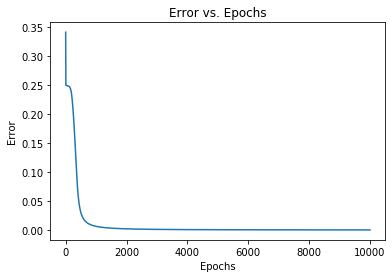

In [6]:
# Error of XOR function
import matplotlib.pyplot as plt
plt.title("Error vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(np.arange(0,epochs), error_ans)

In [7]:
print("Train error:",error_ans[-1],"Test error:",metrics.mean_squared_error(y_train, predictor))

Train error: 0.00024031098056332466 Test error: 0.00024028315944771552


## Train sin function

In [8]:
epochs = 200
activate_func = "tanh"

X_data = np.random.uniform(-1.0,1.0,(200,4))
y_data = np.zeros((200,1))
for i in range(0,X_data.shape[0]):
    y_data[i][0]=math.sin(X_data[i][0]-X_data[i][1]+X_data[i][2]-X_data[i][3])

X_train, X_test, y_train, y_test \
    = train_test_split(X_data,y_data,train_size = 150/200)
    
ni = X_train.shape[1]
nh = 10
no = y_train.shape[1]

error_ans = np.zeros(epochs)
print("Training:\n")
model = MLP(ni,nh,no)
model.randomize()
for _ in range(0,epochs):
    model.forward(X_train,activate_func)
    error = model.backwards(X_train,y_train,activate_func)
    model.updateWeights(0.001)
    error_ans[_]=float(error)
    print("Epochs: %d, Error: %.4f"%(_,error))

predictor = np.zeros(50)
print("Testing:\n")
for i in range(0,X_test.shape[0]):
    model.forward(X_test[i],activate_func)
    predictor[i] = float(model.o)
y_test = y_test.reshape(50)
print("Test error:",metrics.mean_squared_error(y_test, predictor))

Training:

Epochs: 0, Error: 1.1074
Epochs: 1, Error: 1.0800
Epochs: 2, Error: 1.0520
Epochs: 3, Error: 1.0232
Epochs: 4, Error: 0.9934
Epochs: 5, Error: 0.9622
Epochs: 6, Error: 0.9292
Epochs: 7, Error: 0.8940
Epochs: 8, Error: 0.8559
Epochs: 9, Error: 0.8145
Epochs: 10, Error: 0.7690
Epochs: 11, Error: 0.7189
Epochs: 12, Error: 0.6637
Epochs: 13, Error: 0.6034
Epochs: 14, Error: 0.5386
Epochs: 15, Error: 0.4709
Epochs: 16, Error: 0.4035
Epochs: 17, Error: 0.3407
Epochs: 18, Error: 0.2869
Epochs: 19, Error: 0.2447
Epochs: 20, Error: 0.2139
Epochs: 21, Error: 0.1921
Epochs: 22, Error: 0.1763
Epochs: 23, Error: 0.1645
Epochs: 24, Error: 0.1549
Epochs: 25, Error: 0.1469
Epochs: 26, Error: 0.1399
Epochs: 27, Error: 0.1336
Epochs: 28, Error: 0.1279
Epochs: 29, Error: 0.1227
Epochs: 30, Error: 0.1179
Epochs: 31, Error: 0.1134
Epochs: 32, Error: 0.1093
Epochs: 33, Error: 0.1055
Epochs: 34, Error: 0.1019
Epochs: 35, Error: 0.0985
Epochs: 36, Error: 0.0954
Epochs: 37, Error: 0.0925
Epochs: 38,

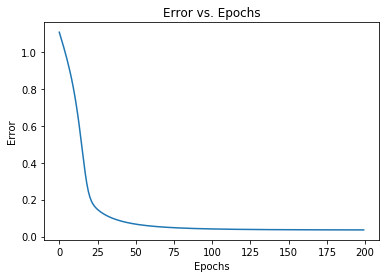

In [9]:
# Error of XOR function
import matplotlib.pyplot as plt
plt.title("Error vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(np.arange(0,epochs), error_ans)

In [10]:
print("Train error:",error_ans[-1],"Test error:",metrics.mean_squared_error(y_test, predictor))

Train error: 0.035973825383496964 Test error: 0.01634570722743973


## Letter Recognition

In [11]:
import pandas as pd
import keras
data=pd.read_table('letter-recognition.data',names=['target']+[i for i in range(16)],sep=',')
data.to_csv('recognition.csv',index=False)

Using TensorFlow backend.


In [12]:
dataset = pd.read_csv('recognition.csv')
dataset.head()

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [13]:
y_data = dataset['target'].values
X_data = dataset.drop('target',axis=1,inplace=False).values

In [14]:
from sklearn import preprocessing
num_classes = 26

y_train_encoder = preprocessing.LabelEncoder()
y_train_num = y_train_encoder.fit_transform(y_data)
y_train_wide = keras.utils.to_categorical(y_train_num, num_classes)

classes_num_label = dict()
for idx, lbl in enumerate(y_train_encoder.classes_):
    classes_num_label[idx] = lbl
print(classes_num_label)
print(y_train_wide)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [15]:
X_train, X_test, y_train, y_test= train_test_split(X_data,y_train_wide,train_size = 4/5)

In [16]:
epochs = 1000
activate_func = "sig"
    
ni = 16
nh = 15
no = 26

error_ans = np.zeros(epochs)
print("Training:\n")
model = MLP(ni,nh,no)
model.randomize()
for _ in range(0,epochs):
    model.forward(X_train,activate_func)
    error = model.backwards(X_train,y_train,activate_func)
    model.updateWeights(0.001)
    error_ans[_]=float(error)
    print("Epochs: %d, Error: %.4f"%(_,error))

predictor = np.zeros((y_test.shape[0],y_test.shape[1]))
print("Testing:\n",predictor.shape,y_test.shape)
for i in range(0,X_test.shape[0]):
    model.forward(X_test[i],activate_func)
    predictor[i] = model.o
print("Test error:",metrics.mean_squared_error(y_test, predictor))

Training:

Epochs: 0, Error: 0.9602
Epochs: 1, Error: 0.9597
Epochs: 2, Error: 0.9581
Epochs: 3, Error: 0.9258
Epochs: 4, Error: 0.8880
Epochs: 5, Error: 0.8832
Epochs: 6, Error: 0.7994
Epochs: 7, Error: 0.7087
Epochs: 8, Error: 0.6220
Epochs: 9, Error: 0.4983
Epochs: 10, Error: 0.4527
Epochs: 11, Error: 0.3861
Epochs: 12, Error: 0.3573
Epochs: 13, Error: 0.3565
Epochs: 14, Error: 0.3456
Epochs: 15, Error: 0.3096
Epochs: 16, Error: 0.2510
Epochs: 17, Error: 0.2508
Epochs: 18, Error: 0.2501
Epochs: 19, Error: 0.2351
Epochs: 20, Error: 0.2154
Epochs: 21, Error: 0.2145
Epochs: 22, Error: 0.1921
Epochs: 23, Error: 0.1800
Epochs: 24, Error: 0.1800
Epochs: 25, Error: 0.1799
Epochs: 26, Error: 0.1796
Epochs: 27, Error: 0.1783
Epochs: 28, Error: 0.1453
Epochs: 29, Error: 0.1444
Epochs: 30, Error: 0.1442
Epochs: 31, Error: 0.1437
Epochs: 32, Error: 0.1390
Epochs: 33, Error: 0.1066
Epochs: 34, Error: 0.0734
Epochs: 35, Error: 0.0731
Epochs: 36, Error: 0.0711
Epochs: 37, Error: 0.0380
Epochs: 38,

Epochs: 311, Error: 0.0379
Epochs: 312, Error: 0.0379
Epochs: 313, Error: 0.0379
Epochs: 314, Error: 0.0379
Epochs: 315, Error: 0.0379
Epochs: 316, Error: 0.0379
Epochs: 317, Error: 0.0379
Epochs: 318, Error: 0.0379
Epochs: 319, Error: 0.0379
Epochs: 320, Error: 0.0379
Epochs: 321, Error: 0.0379
Epochs: 322, Error: 0.0379
Epochs: 323, Error: 0.0379
Epochs: 324, Error: 0.0379
Epochs: 325, Error: 0.0379
Epochs: 326, Error: 0.0379
Epochs: 327, Error: 0.0379
Epochs: 328, Error: 0.0379
Epochs: 329, Error: 0.0379
Epochs: 330, Error: 0.0379
Epochs: 331, Error: 0.0379
Epochs: 332, Error: 0.0379
Epochs: 333, Error: 0.0379
Epochs: 334, Error: 0.0379
Epochs: 335, Error: 0.0379
Epochs: 336, Error: 0.0379
Epochs: 337, Error: 0.0379
Epochs: 338, Error: 0.0379
Epochs: 339, Error: 0.0379
Epochs: 340, Error: 0.0379
Epochs: 341, Error: 0.0379
Epochs: 342, Error: 0.0379
Epochs: 343, Error: 0.0379
Epochs: 344, Error: 0.0379
Epochs: 345, Error: 0.0379
Epochs: 346, Error: 0.0379
Epochs: 347, Error: 0.0379
E

Epochs: 615, Error: 0.0379
Epochs: 616, Error: 0.0379
Epochs: 617, Error: 0.0379
Epochs: 618, Error: 0.0379
Epochs: 619, Error: 0.0379
Epochs: 620, Error: 0.0379
Epochs: 621, Error: 0.0379
Epochs: 622, Error: 0.0379
Epochs: 623, Error: 0.0379
Epochs: 624, Error: 0.0379
Epochs: 625, Error: 0.0379
Epochs: 626, Error: 0.0379
Epochs: 627, Error: 0.0379
Epochs: 628, Error: 0.0379
Epochs: 629, Error: 0.0379
Epochs: 630, Error: 0.0379
Epochs: 631, Error: 0.0379
Epochs: 632, Error: 0.0379
Epochs: 633, Error: 0.0379
Epochs: 634, Error: 0.0379
Epochs: 635, Error: 0.0379
Epochs: 636, Error: 0.0379
Epochs: 637, Error: 0.0379
Epochs: 638, Error: 0.0379
Epochs: 639, Error: 0.0379
Epochs: 640, Error: 0.0379
Epochs: 641, Error: 0.0379
Epochs: 642, Error: 0.0379
Epochs: 643, Error: 0.0379
Epochs: 644, Error: 0.0379
Epochs: 645, Error: 0.0379
Epochs: 646, Error: 0.0379
Epochs: 647, Error: 0.0379
Epochs: 648, Error: 0.0379
Epochs: 649, Error: 0.0379
Epochs: 650, Error: 0.0379
Epochs: 651, Error: 0.0379
E

Epochs: 923, Error: 0.0379
Epochs: 924, Error: 0.0379
Epochs: 925, Error: 0.0379
Epochs: 926, Error: 0.0379
Epochs: 927, Error: 0.0379
Epochs: 928, Error: 0.0379
Epochs: 929, Error: 0.0379
Epochs: 930, Error: 0.0379
Epochs: 931, Error: 0.0379
Epochs: 932, Error: 0.0379
Epochs: 933, Error: 0.0379
Epochs: 934, Error: 0.0379
Epochs: 935, Error: 0.0379
Epochs: 936, Error: 0.0379
Epochs: 937, Error: 0.0379
Epochs: 938, Error: 0.0379
Epochs: 939, Error: 0.0379
Epochs: 940, Error: 0.0379
Epochs: 941, Error: 0.0379
Epochs: 942, Error: 0.0379
Epochs: 943, Error: 0.0379
Epochs: 944, Error: 0.0379
Epochs: 945, Error: 0.0379
Epochs: 946, Error: 0.0379
Epochs: 947, Error: 0.0379
Epochs: 948, Error: 0.0379
Epochs: 949, Error: 0.0379
Epochs: 950, Error: 0.0379
Epochs: 951, Error: 0.0379
Epochs: 952, Error: 0.0379
Epochs: 953, Error: 0.0379
Epochs: 954, Error: 0.0379
Epochs: 955, Error: 0.0379
Epochs: 956, Error: 0.0379
Epochs: 957, Error: 0.0379
Epochs: 958, Error: 0.0379
Epochs: 959, Error: 0.0379
E

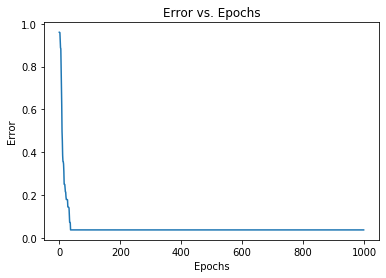

In [17]:
# Error of letter recognition
import matplotlib.pyplot as plt
plt.title("Error vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(np.arange(0,epochs), error_ans)

In [18]:
print("Train error:",error_ans[-1],"Test error:",metrics.mean_squared_error(y_test, predictor))

Train error: 0.03793573397840257 Test error: 0.0379237778779212


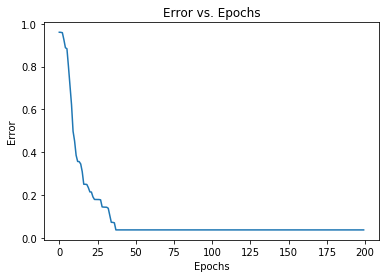

In [19]:
# Error of epochs 1-200
import matplotlib.pyplot as plt
plt.title("Error vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(np.arange(0,200), error_ans[:200])

In [20]:
activate_func = "tanh"
error_ans = np.zeros(epochs)
print("Training:\n")
model = MLP(ni,nh,no)
model.randomize()
for _ in range(0,epochs):
    model.forward(X_train,activate_func)
    error = model.backwards(X_train,y_train,activate_func)
    model.updateWeights(0.001)
    error_ans[_]=float(error)
    print("Epochs: %d, Error: %.4f"%(_,error))

predictor = np.zeros((y_test.shape[0],y_test.shape[1]))
print("Testing:\n",predictor.shape,y_test.shape)
for i in range(0,X_test.shape[0]):
    model.forward(X_test[i],activate_func)
    predictor[i] = model.o
print("Test error:",metrics.mean_squared_error(y_test, predictor))

Training:

Epochs: 0, Error: 0.9615
Epochs: 1, Error: 0.9615
Epochs: 2, Error: 0.9615
Epochs: 3, Error: 0.9615
Epochs: 4, Error: 0.9615
Epochs: 5, Error: 0.9615
Epochs: 6, Error: 0.9615
Epochs: 7, Error: 0.9615
Epochs: 8, Error: 0.9615
Epochs: 9, Error: 0.9615
Epochs: 10, Error: 0.9615
Epochs: 11, Error: 0.9615
Epochs: 12, Error: 0.9615
Epochs: 13, Error: 0.9615
Epochs: 14, Error: 0.9615
Epochs: 15, Error: 0.9615
Epochs: 16, Error: 0.9615
Epochs: 17, Error: 0.9615
Epochs: 18, Error: 0.9615
Epochs: 19, Error: 0.9615
Epochs: 20, Error: 0.9615
Epochs: 21, Error: 0.9615
Epochs: 22, Error: 0.9615
Epochs: 23, Error: 0.9615
Epochs: 24, Error: 0.9615
Epochs: 25, Error: 0.9615
Epochs: 26, Error: 0.9615
Epochs: 27, Error: 0.9615
Epochs: 28, Error: 0.9615
Epochs: 29, Error: 0.9615
Epochs: 30, Error: 0.9614
Epochs: 31, Error: 0.9613
Epochs: 32, Error: 0.9597
Epochs: 33, Error: 0.9671
Epochs: 34, Error: 0.9577
Epochs: 35, Error: 0.9677
Epochs: 36, Error: 0.9677
Epochs: 37, Error: 0.9677
Epochs: 38,

Epochs: 308, Error: 0.9970
Epochs: 309, Error: 0.9970
Epochs: 310, Error: 0.9970
Epochs: 311, Error: 0.9970
Epochs: 312, Error: 0.9970
Epochs: 313, Error: 0.9970
Epochs: 314, Error: 0.9970
Epochs: 315, Error: 0.9970
Epochs: 316, Error: 0.9970
Epochs: 317, Error: 0.9970
Epochs: 318, Error: 0.9970
Epochs: 319, Error: 0.9970
Epochs: 320, Error: 0.9970
Epochs: 321, Error: 0.9970
Epochs: 322, Error: 0.9970
Epochs: 323, Error: 0.9970
Epochs: 324, Error: 0.9970
Epochs: 325, Error: 0.9970
Epochs: 326, Error: 0.9970
Epochs: 327, Error: 0.9970
Epochs: 328, Error: 0.9970
Epochs: 329, Error: 0.9970
Epochs: 330, Error: 0.9970
Epochs: 331, Error: 0.9970
Epochs: 332, Error: 0.9970
Epochs: 333, Error: 0.9970
Epochs: 334, Error: 0.9970
Epochs: 335, Error: 0.9970
Epochs: 336, Error: 0.9970
Epochs: 337, Error: 0.9970
Epochs: 338, Error: 0.9970
Epochs: 339, Error: 0.9970
Epochs: 340, Error: 0.9970
Epochs: 341, Error: 0.9970
Epochs: 342, Error: 0.9970
Epochs: 343, Error: 0.9970
Epochs: 344, Error: 0.9970
E

Epochs: 613, Error: 1.0084
Epochs: 614, Error: 1.0084
Epochs: 615, Error: 1.0084
Epochs: 616, Error: 1.0084
Epochs: 617, Error: 1.0084
Epochs: 618, Error: 1.0084
Epochs: 619, Error: 1.0084
Epochs: 620, Error: 1.0084
Epochs: 621, Error: 1.0084
Epochs: 622, Error: 1.0084
Epochs: 623, Error: 1.0084
Epochs: 624, Error: 1.0084
Epochs: 625, Error: 1.0084
Epochs: 626, Error: 1.0084
Epochs: 627, Error: 1.0084
Epochs: 628, Error: 1.0084
Epochs: 629, Error: 1.0084
Epochs: 630, Error: 1.0084
Epochs: 631, Error: 1.0084
Epochs: 632, Error: 1.0084
Epochs: 633, Error: 1.0084
Epochs: 634, Error: 1.0084
Epochs: 635, Error: 1.0084
Epochs: 636, Error: 1.0084
Epochs: 637, Error: 1.0084
Epochs: 638, Error: 1.0084
Epochs: 639, Error: 1.0084
Epochs: 640, Error: 1.0084
Epochs: 641, Error: 1.0084
Epochs: 642, Error: 1.0084
Epochs: 643, Error: 1.0084
Epochs: 644, Error: 1.0084
Epochs: 645, Error: 1.0084
Epochs: 646, Error: 1.0084
Epochs: 647, Error: 1.0084
Epochs: 648, Error: 1.0084
Epochs: 649, Error: 1.0084
E

Epochs: 918, Error: 1.0142
Epochs: 919, Error: 1.0142
Epochs: 920, Error: 1.0142
Epochs: 921, Error: 1.0142
Epochs: 922, Error: 1.0142
Epochs: 923, Error: 1.0142
Epochs: 924, Error: 1.0142
Epochs: 925, Error: 1.0142
Epochs: 926, Error: 1.0142
Epochs: 927, Error: 1.0142
Epochs: 928, Error: 1.0142
Epochs: 929, Error: 1.0142
Epochs: 930, Error: 1.0142
Epochs: 931, Error: 1.0142
Epochs: 932, Error: 1.0142
Epochs: 933, Error: 1.0142
Epochs: 934, Error: 1.0142
Epochs: 935, Error: 1.0142
Epochs: 936, Error: 1.0142
Epochs: 937, Error: 1.0142
Epochs: 938, Error: 1.0142
Epochs: 939, Error: 1.0142
Epochs: 940, Error: 1.0142
Epochs: 941, Error: 1.0142
Epochs: 942, Error: 1.0142
Epochs: 943, Error: 1.0142
Epochs: 944, Error: 1.0142
Epochs: 945, Error: 1.0142
Epochs: 946, Error: 1.0142
Epochs: 947, Error: 1.0142
Epochs: 948, Error: 1.0142
Epochs: 949, Error: 1.0142
Epochs: 950, Error: 1.0142
Epochs: 951, Error: 1.0142
Epochs: 952, Error: 1.0142
Epochs: 953, Error: 1.0142
Epochs: 954, Error: 1.0142
E

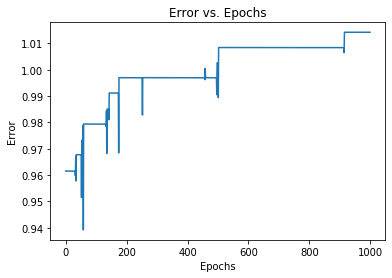

In [21]:
# Error of letter recognition
import matplotlib.pyplot as plt
plt.title("Error vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(np.arange(0,epochs), error_ans)

In [22]:
print("Train error:",error_ans[-1],"Test error:",metrics.mean_squared_error(y_test, predictor))

Train error: 1.0142293448741277 Test error: 1.0154216432105776
